In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('sipall.csv')

In [7]:
#PCAP Data
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,200.57.7.195,200.57.7.204,SIP/SDP,740,Request: INVITE sip:francisco@bestel.com:55060 |
1,2,0.007889,200.57.7.204,200.57.7.195,SIP,503,Status: 100 Trying |
2,3,0.047524,200.57.7.204,200.57.7.195,SIP,504,Status: 180 Ringing |
3,4,0.049780,200.57.7.206,200.57.7.197,TCP,54,1219 > 23 [ACK] Seq=1 Ack=1 Win=17465 Len=0
4,5,0.050802,200.57.7.197,200.57.7.206,TELNET,637,Telnet Data ...
...,...,...,...,...,...,...,...
4264,4265,34.890149,200.57.7.204,200.57.7.194,HTTP,214,POST /cems/applets/serviceRouter HTTP/1.1 (ap...
4265,4266,34.890418,200.57.7.194,200.57.7.204,HTTP,79,HTTP/1.1 100 Continue
4266,4267,34.893607,200.57.7.194,200.57.7.197,SNMP,211,get-request 1.3.6.1.4.1.2858.100.40.3.1.0 1.3....
4267,4268,34.908251,200.57.7.199,200.57.7.196,UDP,214,4800 > 40378 Len=172


In [8]:
#No of Packets
df.shape[0]

4269

In [9]:
#List only SIP Packets
sip = df[df['Protocol'] == 'SIP']
sip

,No.,Time,Source,Destination,Protocol,Length,Info
1,2,0.007889,200.57.7.204,200.57.7.195,SIP,503,Status: 100 Trying |
2,3,0.047524,200.57.7.204,200.57.7.195,SIP,504,Status: 180 Ringing |
151,152,4.056633,200.57.7.205,200.57.7.195,SIP,460,Request: REGISTER sip:Verso.com (1 binding) |
152,153,4.072335,200.57.7.195,200.57.7.205,SIP,514,Status: 200 OK (1 binding) |
516,517,8.524137,200.57.7.195,200.57.7.204,SIP,485,Request: ACK sip:francisco@200.57.7.204:5061 |
1723,1724,17.457029,200.57.7.204,200.57.7.195,SIP,479,Request: REGISTER sip:bestel.com (1 binding) |
1726,1727,17.473413,200.57.7.195,200.57.7.204,SIP,532,Status: 200 OK (1 binding) |
2910,2911,24.309202,200.57.7.205,200.57.7.195,SIP,460,Request: REGISTER sip:Verso.com (1 binding) |
2911,2912,24.324792,200.57.7.195,200.57.7.205,SIP,514,Status: 200 OK (1 binding) |
2964,2965,24.674680,200.57.7.204,200.57.7.195,SIP,530,Status: 100 Trying |


In [10]:
#List the SIP info fields wrt time
sip[['No.', 'Time', 'Info']]

,No.,Time,Info
1,2,0.007889,Status: 100 Trying |
2,3,0.047524,Status: 180 Ringing |
151,152,4.056633,Request: REGISTER sip:Verso.com (1 binding) |
152,153,4.072335,Status: 200 OK (1 binding) |
516,517,8.524137,Request: ACK sip:francisco@200.57.7.204:5061 |
1723,1724,17.457029,Request: REGISTER sip:bestel.com (1 binding) |
1726,1727,17.473413,Status: 200 OK (1 binding) |
2910,2911,24.309202,Request: REGISTER sip:Verso.com (1 binding) |
2911,2912,24.324792,Status: 200 OK (1 binding) |
2964,2965,24.674680,Status: 100 Trying |


In [11]:
#Analysis 1
infos = sip['Info'].to_list()
time = sip['Time'].to_list()

print('Info Fields\n')
for info in infos:
    flag = info.split(':')
    print(flag[0])

Info Fields

Status
Status
Request
Status
Request
Request
Status
Request
Status
Status
Status


In [22]:
import matplotlib.pyplot as plt

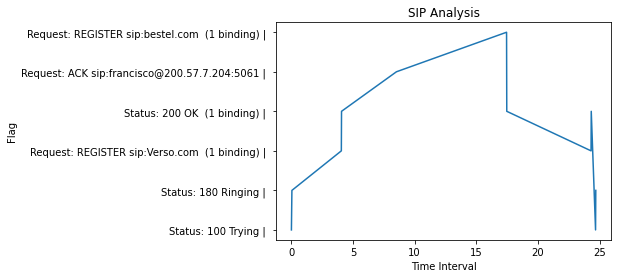

In [21]:
plt.plot(time, infos)
plt.xlabel('Time Interval')
plt.ylabel('Flag')
plt.title('SIP Analysis')
plt.show()